# Multiple Co-Inertia Analysis (MCoIA) Documentation

The MCoIA package is a versatile Python toolkit designed for advanced
data analysis, particularly suited for multi-omics datasets. It excels
at integrating data from various sources and modalities, such as
genomics, proteomics, and metabolomics, to uncover patterns and
relationships that are often obscured in single-dataset analyses. By
leveraging the principles of co-inertia analysis, MCoIA facilitates a
deeper understanding of complex biological systems, aiding researchers
in fields ranging from systems biology to personalized medicine. This
package draws inspiration from the ADE4 package in R. This documentation
provides a comprehensive guide on installation, usage, and development
of MCoIA.

---

# Getting Started

You can download this package from <https://github.com/Akarr0x/mcioa>

To install the package, run the following commands in your terminal:

```bash
git clone https://github.com/Akarr0x/mcioa.git

cd mcioa
```

---

# User Guide

Explore detailed documentation on how to use MCoIA, covering all its
features and functionalities.

-   This is the main use of the MCoIA package:

``` python
import mcoia

data_list = [dataset1, dataset2]

mcia_instance = MCIAnalysis(data_list)
```

`MCIAnalysis()` This function initializes the object that will be used
for further analysis. Its primary purpose is to set up and initialize
the necessary variables. The `MCIAnalysis()` method requires a list of
pandas DataFrame objects as its input. Each DataFrame should contain
structured data corresponding to a particular block of the multi-block
dataset you wish to analyze. Ensure that the DataFrames are
pre-processed and aligned such that rows correspond to samples and
columns to features for consistent analysis across blocks.

``` python
mcia_instance.fit()
```

`fit()` This function prepares the data for the core MCoIA computations
by normalizing each dataset independently. The default normalization
method is Non-Symmetric Correspondence Analysis. However, this can be
altered using the `analysis_type` parameter. By setting `analysis_type`
to 'pca', a different normalization is applied where each cell is
weighted equally.

``` python
mcia_instance.transform()
```

`transform()` This function introduces necessary block differentiation
within the datasets. It is essential for allocating distinct weights
across the datasets appropriately and facilitates the computation of row
and column coordinates in the subsequent analysis steps.

``` python
mcia_instance.results()
```

`results()` This function executes the actual multiple co-inertia
calculations as described in
<a href="#Dray2007" class="citation">[Dray2007]</a>. It enables the
visualization of the dataset in a reduced dimensional space, optimizing
for maximum covariance between the datasets.

The variables `dataset1` and `dataset2` are expected to be pandas
DataFrame objects. The output will include the following variables:

-   `pseudo_eigenvalues`: Eigenvalues derived from the singular value
    decomposition (SVD) on the concatenated datasets, representing the
    variance captured by each principal component.

-   `lambda_df`: A matrix where each element (i, j) corresponds to the
    eigenvalue associated with the ith block's jth factor, summarizing
    the eigenvalues across blocks and factors.

-   `SynVar`: Contains the left singular vectors from the SVD,
    representing the synthetic variables that capture the most variance
    within the data.

-   `axis`: Comprises the right singular vectors from the SVD,
    indicating the principal axes in the factor space.

-   `row_projection`: The projection of the original dataset's rows onto
    the principal components, providing a weighted representation in the
    reduced factor space.

-   `cov2`: A scalar value representing the total covariance explained
    by the current factors, offering a measure of the explanatory power
    of the analysis.

-   `row_projection_normed`: Similar to `row_projection`, but normalized
    to unit length, presenting a standardized view of the dataset's row
    projections.

-   `column_projection`: The projection of the dataset's columns,
    providing a weighted representation of the variables in the factor
    space.

-   `class_type`: Indicates the classification or grouping assigned to
    each object within the analysis, useful for downstream
    categorization or stratification.

    > -   It is also possible to invoke the `project()` method with a
    >     different dataset to project it onto the space defined by the
    >     MCoIA calculation. This can be achieved by calling
    >     `MCIAnalysis.project(dataset3)`.

---

# Using MCoIA with Example Datasets

To illustrate how to use the MCoIA package, consider the following
example where we have two datasets represented as lists of values. These
lists are then converted into pandas DataFrame objects with
corresponding gene names and cell names as indices and columns,
respectively.

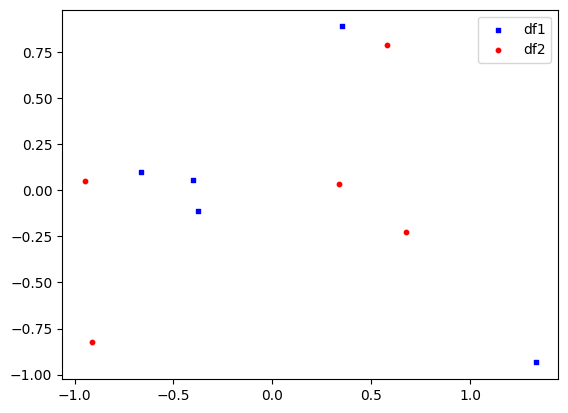

In [17]:
dataset1 = [
    [23, 43, 65, 22, 1, 78],
    [34, 23, 45, 65, 23, 43],
    [45, 67, 23, 54, 23, 65],
    [56, 43, 23, 43, 23, 54],
    [67, 65, 34, 65, 12, 43]
]

dataset2 = [
    [34, 56, 23, 12, 43, 23],
    [45, 34, 56, 54, 23, 54],
    [65, 43, 23, 43, 34, 23],
    [23, 12, 34, 65, 43, 65],
    [43, 23, 65, 34, 23, 54]
]

gene_names = [f"Gene_{i}" for i in range(1, 6)]
col_names = [f"Cell_{i}" for i in range(1, 7)]

import pandas as pd
from mcoia.classes import MCIAnalysis
from mcoia.functions import *

df1 = pd.DataFrame(dataset1, index=gene_names, columns=col_names)
df2 = pd.DataFrame(dataset2, index=gene_names, columns=col_names)

data_list = [df1, df2]

mcia_instance = MCIAnalysis(data_list)

mcia_instance.fit()

mcia_instance.transform()

mcia_instance.results()
half_size = mcia_instance.column_projection.shape[0] // 2

data1 = mcia_instance.column_projection.iloc[:half_size]
data2 = mcia_instance.column_projection.iloc[half_size:]

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(data1['SV1'], data1['SV2'], s=10, c="b", marker="s", label="df1")
ax.scatter(data2['SV1'], data2['SV2'], s=10, c="r", marker="o", label="df2")
ax.legend()
plt.show()

---


# Developer Guide


Welcome to the MCoIA community! My name is Alessandro, the creator and
current sole developer of this package, developed as part of my master's
thesis. While I'm continually learning in this field, I'm excited to
collaborate with others who are interested in contributing, regardless
of their level of expertise. Whether it's improving the code, enhancing
documentation, or suggesting new features, every contribution is
valuable. For collaboration or contributions, please feel free to use
the GitHub issues or discussions for this project.

Setting Up Development Environment:

``` bash
git clone https://github.com/Akarr0x/mcioa.git

cd mcioa

python -m venv venv

source venv/bin/activate  # On Windows use `venv\Scripts\activate`

pip install -r requirements.txt

pip install .

pytest test
```

---

**How to Contribute**

Welcome to the MCoIA project! Here's a simple step-by-step guide to get
you started:

1.  **Forking the Repository**: First, visit the [MCoIA GitHub
    repository](https://github.com/Akarr0x/mcioa) and click on the
    'Fork' button. This creates a copy of the project in your GitHub
    account.
2.  **Creating a New Branch**: After forking, clone the repository to
    your local machine and create a new branch for your contributions:

``` bash
git checkout -b my-new-feature
```

1.  **Making and Committing Changes**: Make your desired changes in this
    new branch. Once you're done, commit these changes with a clear
    message:

``` bash
git commit -m "Add a brief description of your changes"
```

1.  **Pushing Changes to Your Fork**: Push your new branch and changes
    to your forked repository on GitHub:

``` bash
git push origin my-new-feature
```

1.  **Creating a Pull Request**: Go to your fork on GitHub and click
    'New Pull Request'. Describe your changes and then submit the pull
    request.

**Code of Conduct**

We highly value respect and kindness. Our community embraces the
principles outlined in the Python Software Foundation's Code of Conduct,
which can be found [here](https://www.python.org/psf/conduct/). These
values represent the core of how we interact and collaborate.

**Community Guidelines**

We believe in a collaborative and open environment. Here's how you can
actively participate:

-   **Discussing Features**: Got an idea for a new feature or
    improvement? We'd love to hear about it! Please open a 'Feature
    Request' issue on our GitHub repository to start the conversation.

**Reporting Bugs/Issues**

If you encounter a bug, we'd appreciate your help in fixing it:

1.  **Check Existing Issues**: Before reporting, please check if the bug
    has already been reported. If it has, feel free to add any
    additional information you might have to the existing report.
2.  **Open a New Issue**: If the bug hasn't been reported yet, open a
    new issue on our GitHub repository. Provide as much detail as
    possible, including steps to reproduce the bug, and any relevant
    screenshots or error messages.

Your contributions and suggestions, no matter how big or small, are
highly valued.

---

# References

The development of MCoIA was informed by the following works:

<span id="Bougeard2018" class="citation-label">Bougeard2018</span>  
Bougeard, S., & Dray, S. (2018). "Supervised Multiblock Analysis in R
with the ade4 Package." Journal of Statistical Software, 86(1), 1-17.
<doi:10.18637/jss.v086.i01>.

<span id="Chessel2004" class="citation-label">Chessel2004</span>  
Chessel, D., Dufour, A., & Thioulouse, J. (2004). "The ade4 Package – I:
One-Table Methods." R News, 4(1), 5-10. [Available
online](https://cran.r-project.org/doc/Rnews/).

<span id="Dray2007" class="citation-label">Dray2007</span>  
Dray, S., & Dufour, A. (2007). "The ade4 Package: Implementing the
Duality Diagram for Ecologists." Journal of Statistical Software, 22(4),
1-20. <doi:10.18637/jss.v022.i04>.

<span id="Dray2007-2" class="citation-label">Dray2007-2</span>  
Dray, S., Dufour, A., & Chessel, D. (2007). "The ade4 Package – II:
Two-Table and K-Table Methods." R News, 7(2), 47-52. [Available
online](https://cran.r-project.org/doc/Rnews/).

<span id="Thioulouse2018" class="citation-label">Thioulouse2018</span>  
Thioulouse, J., Dray, S., Dufour, A., Siberchicot, A., Jombart, T., &
Pavoine, S. (2018). Multivariate Analysis of Ecological Data with ade4.
Springer. <doi:10.1007/978-1-4939-8850-1>.